# Vehicle Insurance Model Evaluation and Visualization
This notebook provides comprehensive evaluation and visualization of the trained vehicle insurance premium prediction model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the trained vehicle insurance model and data
try:
    with open('../models/best_vehicle_insurance_model.pkl', 'rb') as f:
        model = pickle.load(f)
    print("Vehicle insurance model loaded successfully!")
    
    with open('../models/model_info.pkl', 'rb') as f:
        model_info = pickle.load(f)
    print("Vehicle insurance model info loaded successfully!")
    
    df = pd.read_csv('../dataset/vehicle_insurance_preprocessed.csv')
    print(f"Vehicle insurance dataset loaded successfully! Shape: {df.shape}")
    
except FileNotFoundError as e:
    print(f"File not found: {e}")
    print("Please run the preprocessing and training notebooks first.")
    raise

Vehicle insurance model loaded successfully!
Vehicle insurance model info loaded successfully!
Vehicle insurance dataset loaded successfully! Shape: (101, 19)


In [3]:
# Prepare data for evaluation
X = df.drop('premium', axis=1)
y = df['premium']

# Split data (same as training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Data prepared and predictions made!")

Data prepared and predictions made!


In [4]:
# Calculate current metrics for evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Display vehicle insurance model performance summary
print("=" * 60)
print("    VEHICLE INSURANCE MODEL PERFORMANCE SUMMARY")
print("=" * 60)

print(f"\n Model Type: {model_info['model_name']}")

print(f"\n Training Metrics:")
print(f"   • Mean Squared Error (MSE): ${train_mse:,.2f}")
print(f"   • Mean Absolute Error (MAE): ${train_mae:,.2f}")
print(f"   • R² Score: {train_r2:.4f} ({train_r2*100:.2f}%)")

print(f"\n Testing Metrics:")
print(f"   • Mean Squared Error (MSE): ${test_mse:,.2f}")
print(f"   • Mean Absolute Error (MAE): ${test_mae:,.2f}")
print(f"   • R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")

print(f"\n Model Interpretation:")
print(f"   • The model explains {test_r2*100:.1f}% of variance in vehicle insurance premiums")
print(f"   • Average prediction error: ${test_mae:,.0f}")

    VEHICLE INSURANCE MODEL PERFORMANCE SUMMARY

 Model Type: Linear Regression

 Training Metrics:
   • Mean Squared Error (MSE): $7,211.28
   • Mean Absolute Error (MAE): $68.76
   • R² Score: 0.9647 (96.47%)

 Testing Metrics:
   • Mean Squared Error (MSE): $19,186.62
   • Mean Absolute Error (MAE): $102.25
   • R² Score: 0.8716 (87.16%)

 Model Interpretation:
   • The model explains 87.2% of variance in vehicle insurance premiums
   • Average prediction error: $102


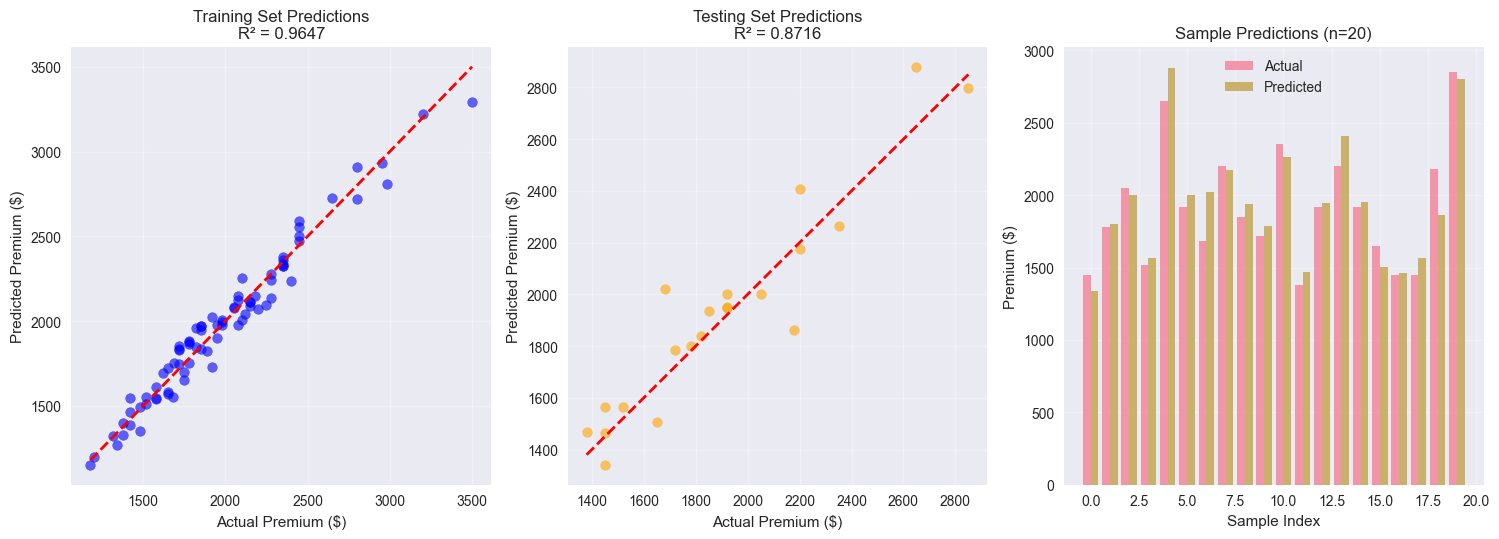


 Evaluation completed for Linear Regression model!
Final Accuracy: 87.2%
Average Error: $102


In [5]:
# Fixed sample size issue to prevent ValueError
# Comprehensive vehicle insurance visualization dashboard
fig = plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted (Training)
plt.subplot(3, 4, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Premium ($)')
plt.ylabel('Predicted Premium ($)')
plt.title(f'Training Set Predictions\nR² = {train_r2:.4f}')
plt.grid(alpha=0.3)

# 2. Actual vs Predicted (Testing)
plt.subplot(3, 4, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Premium ($)')
plt.ylabel('Predicted Premium ($)')
plt.title(f'Testing Set Predictions\nR² = {test_r2:.4f}')
plt.grid(alpha=0.3)

# 3. Sample Predictions Comparison - FIXED
plt.subplot(3, 4, 3)
sample_size = min(20, len(y_test))  # Use smaller of 20 or actual test set size
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
sample_actual = y_test.iloc[sample_indices]
sample_pred = y_test_pred[sample_indices]

x_pos = np.arange(len(sample_indices))
plt.bar(x_pos - 0.2, sample_actual, 0.4, label='Actual', alpha=0.7)
plt.bar(x_pos + 0.2, sample_pred, 0.4, label='Predicted', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Premium ($)')
plt.title(f'Sample Predictions (n={sample_size})')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Evaluation completed for {model_info['model_name']} model!")
print(f"Final Accuracy: {test_r2*100:.1f}%")
print(f"Average Error: ${test_mae:.0f}")